In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
advertising = pd.read_csv(url)
advertising.shape

(200, 2)

In [3]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: >

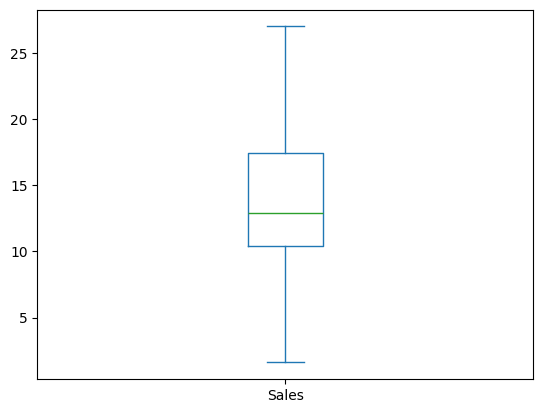

In [4]:
advertising['Sales'].plot.box()

<Axes: ylabel='Frequency'>

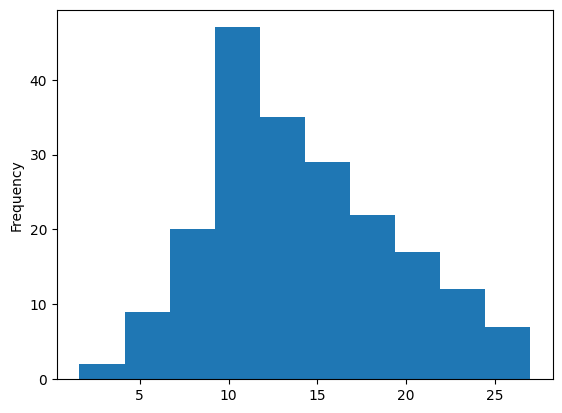

In [5]:
advertising['Sales'].plot.hist()

In [6]:
input = np.array(advertising['TV'])
target = np.array(advertising['Sales'])

<ipython-input-7-690f007e9c25>:6: RuntimeWarning: divide by zero encountered in log
  Y = np.log(X)/np.log(i)


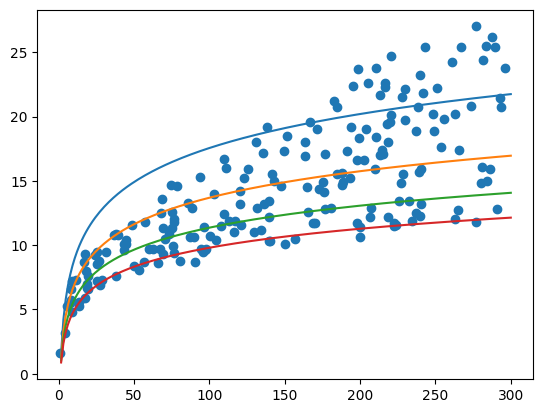

In [7]:
import matplotlib.pyplot as plt

plt.scatter(input, target)
X = np.linspace(0,300, 200)
for i in np.arange(1.3,1.7,0.1):
  Y = np.log(X)/np.log(i)
  plt.plot(X,Y)

<ipython-input-8-b461192dccd0>:2: RuntimeWarning: divide by zero encountered in log
  Y = np.log(X)/np.log(1.5) + np.random.randn(200)*1.5


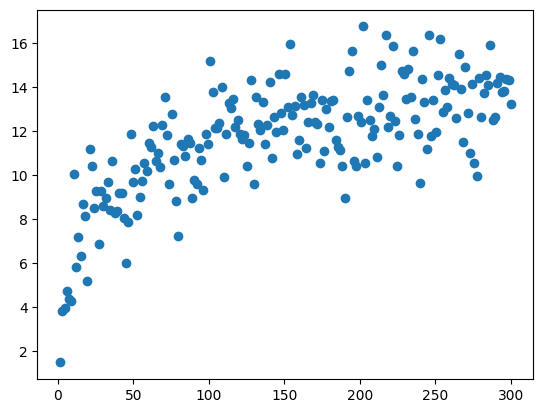

In [8]:
X = np.linspace(0,300, 200)
Y = np.log(X)/np.log(1.5) + np.random.randn(200)*1.5
plt.scatter(X,Y)

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.25, random_state=1000) # default : 0.25
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(150,) (50,) (150,) (50,)
(150, 1) (50, 1) (150,) (50,)


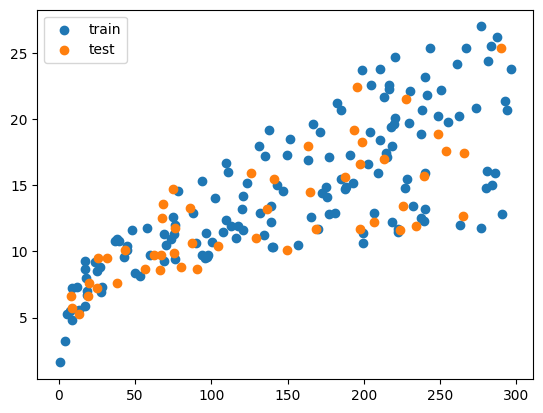

In [10]:
plt.scatter(train_input, train_target, label='train')
plt.scatter(test_input, test_target, label='test')
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(test_input, test_target))

0.5707164995362264


In [12]:
print(lr.coef_, lr.intercept_)

[0.04869785] 7.034029506318946


In [13]:
train_acc = lr.score(train_input, train_target)
test_acc = lr.score(test_input, test_target)
print(f"train 정확도 : {train_acc} / test 정확도 : {test_acc}")
print("Overfitting" if train_acc > test_acc else "Underfitting")

train 정확도 : 0.6092999786227109 / test 정확도 : 0.5707164995362264
Overfitting


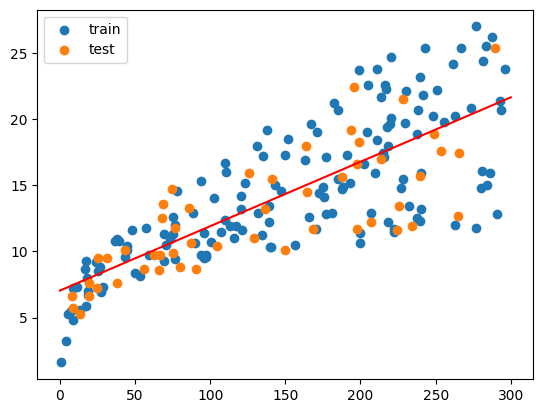

In [14]:
X = np.linspace(0,300,1000)
Y = lr.coef_[0] * X + lr.intercept_
plt.plot(X, Y, 'r')
plt.scatter(train_input, train_target, label='train')
plt.scatter(test_input, test_target, label='test')
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(poly.get_feature_names_out())

(150, 2)
['x0' 'x0^2']


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(test_poly, test_target))
print(lr.coef_, lr.intercept_)

train_acc = lr.score(train_poly, train_target)
test_acc = lr.score(test_poly, test_target)
print(f"train 정확도 : {train_acc} / test 정확도 : {test_acc}")
print("Overfitting" if train_acc > test_acc else "Underfitting")

0.5682495241240388
[ 7.11518574e-02 -7.69122939e-05] 5.965424515651618
train 정확도 : 0.6183920233147562 / test 정확도 : 0.5682495241240388
Overfitting


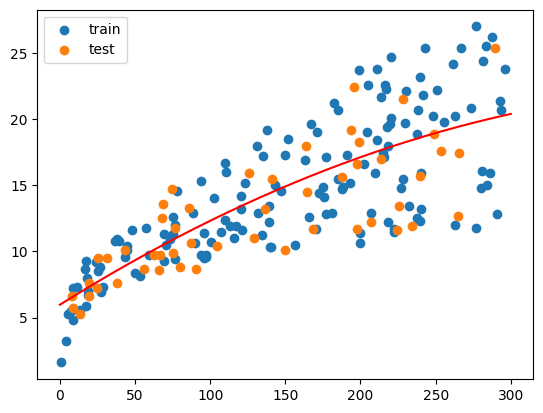

In [17]:
X = np.linspace(0,300,1000)
Y = lr.coef_[1] * X**2 + lr.coef_[0] * X + lr.intercept_
plt.plot(X, Y, 'r')
plt.scatter(train_input, train_target, label='train')
plt.scatter(test_input, test_target, label='test')
plt.legend()
plt.show()

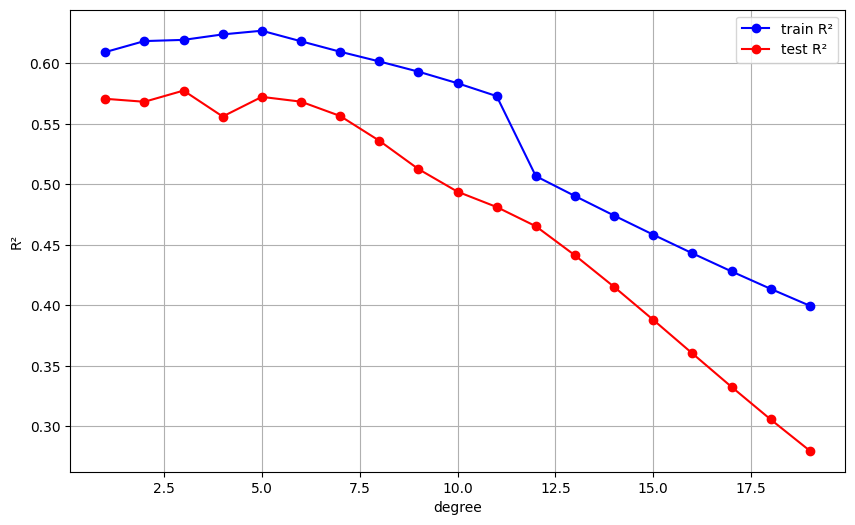

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# 다양한 차수에 대한 결과 저장할 리스트
degrees = range(1, 20)  # 1차부터 19차까지
train_scores = []
test_scores = []

for degree in degrees:
    # 모델 생성
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # 모델 학습
    model.fit(train_input, train_target)

    # 훈련 세트 점수
    train_score = model.score(train_input, train_target)
    train_scores.append(train_score)

    # 테스트 세트 점수
    test_score = model.score(test_input, test_target)
    test_scores.append(test_score)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', color='blue', label='train R²')
plt.plot(degrees, test_scores, 'o-', color='red', label='test R²')
plt.xlabel('degree')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.508e+02, tolerance: 4.304e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.310e+02, tolerance: 4.304e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.309e+02, tolerance: 4.304e

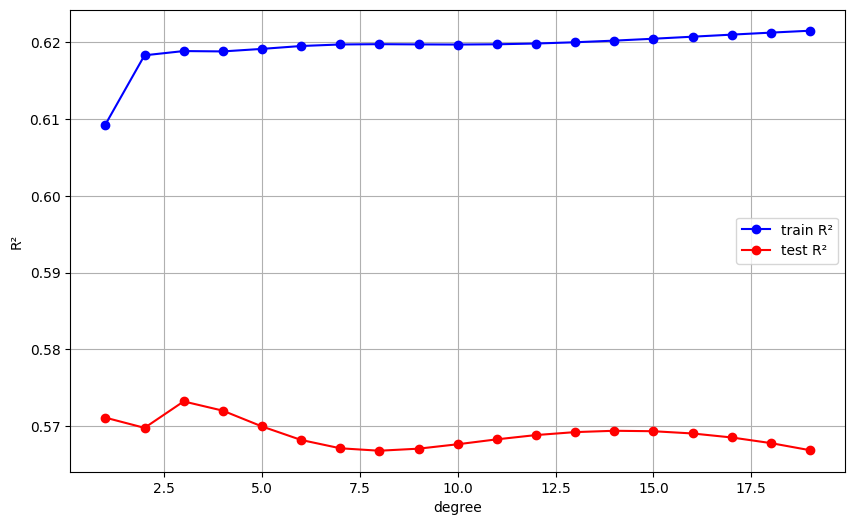

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# 다양한 차수에 대한 결과 저장할 리스트
degrees = range(1, 20)  # 1차부터 19차까지
train_scores = []
test_scores = []

for degree in degrees:
    # 모델 생성
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', Lasso())
    ])

    # 모델 학습
    model.fit(train_input, train_target)

    # 훈련 세트 점수
    train_score = model.score(train_input, train_target)
    train_scores.append(train_score)

    # 테스트 세트 점수
    test_score = model.score(test_input, test_target)
    test_scores.append(test_score)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', color='blue', label='train R²')
plt.plot(degrees, test_scores, 'o-', color='red', label='test R²')
plt.xlabel('degree')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.60027e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.02834e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.54046e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.14942e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

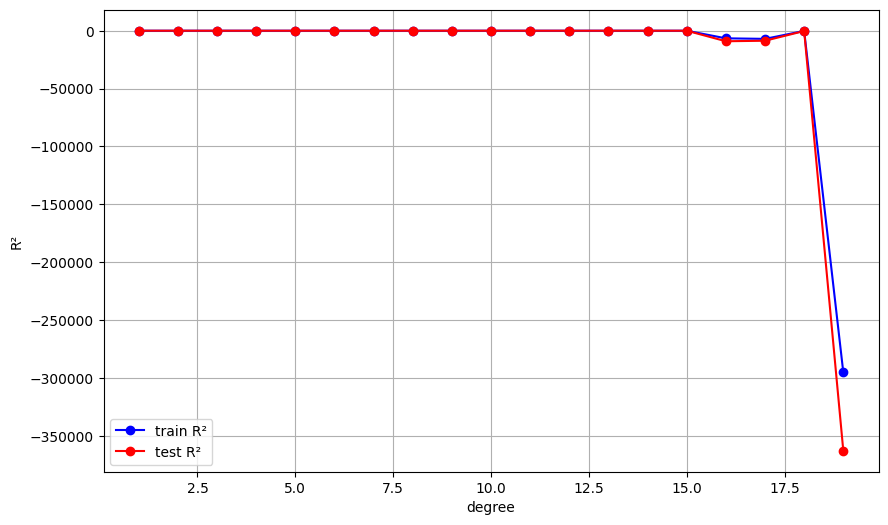

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# 다양한 차수에 대한 결과 저장할 리스트
degrees = range(1, 20)  # 1차부터 19차까지
train_scores = []
test_scores = []

for degree in degrees:
    # 모델 생성
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', Ridge())
    ])

    # 모델 학습
    model.fit(train_input, train_target)

    # 훈련 세트 점수
    train_score = model.score(train_input, train_target)
    train_scores.append(train_score)

    # 테스트 세트 점수
    test_score = model.score(test_input, test_target)
    test_scores.append(test_score)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', color='blue', label='train R²')
plt.plot(degrees, test_scores, 'o-', color='red', label='test R²')
plt.xlabel('degree')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

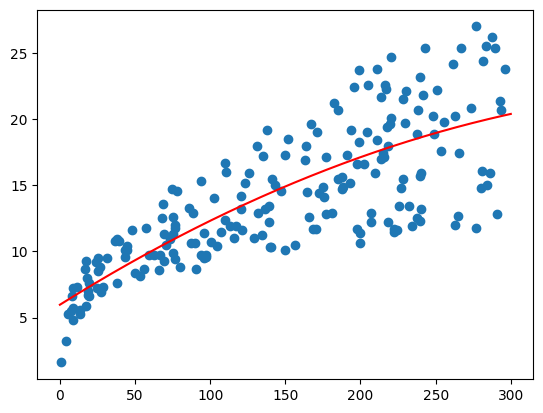

In [21]:
plt.scatter(input, target)
X = np.linspace(0,300,1000)
f=lambda x: lr.coef_[1] * x**2 + lr.coef_[0] * x + lr.intercept_
Y = f(X)
plt.plot(X, Y, 'r')

In [22]:
def experiment(degree, plot=True):
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=degree)),
      ('linear', LinearRegression())
  ])

  model.fit(train_input, train_target)

  train_acc = model.score(train_input, train_target)
  test_acc = model.score(test_input, test_target)

  if plot:
    plt.scatter(train_input, train_target, label='train')
    plt.scatter(test_input, test_target, label='test')
    plt.legend()
    X = np.linspace(0,300,1000)
    def f(x):
      result = model.linear.intercept_
      for i,coef in enumerate(model.linear.coef_):
        result += coef * x**(i+1)
      return result
    Y = f(X)
    plt.plot(X, Y, 'r')

  return train_acc, test_acc

In [23]:
for degree in range(2,125):
  train_acc,test_acc = experiment(degree, plot=False)
  print(f"차수 : {degree} -> train : {train_acc} / test : {test_acc}")
  print(("\033[32mOverfitting" if train_acc > test_acc else "\033[31mUnderfitting")+'\033[0m')
  if train_acc > test_acc:
    break

차수 : 2 -> train : 0.6183920233147562 / test : 0.5682495241240533
Overfitting


AttributeError: 'Pipeline' object has no attribute 'linear'

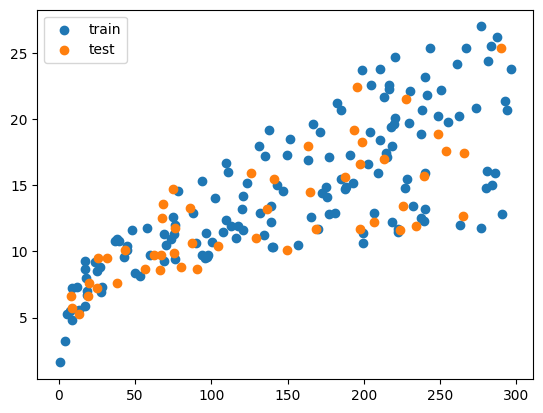

In [24]:
experiment(5)

AttributeError: 'Pipeline' object has no attribute 'linear'

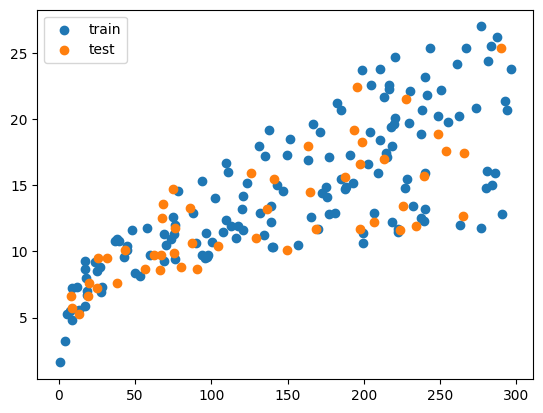

In [25]:
experiment(30)

Train MSE: 23.51
Test MSE: 22.09


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


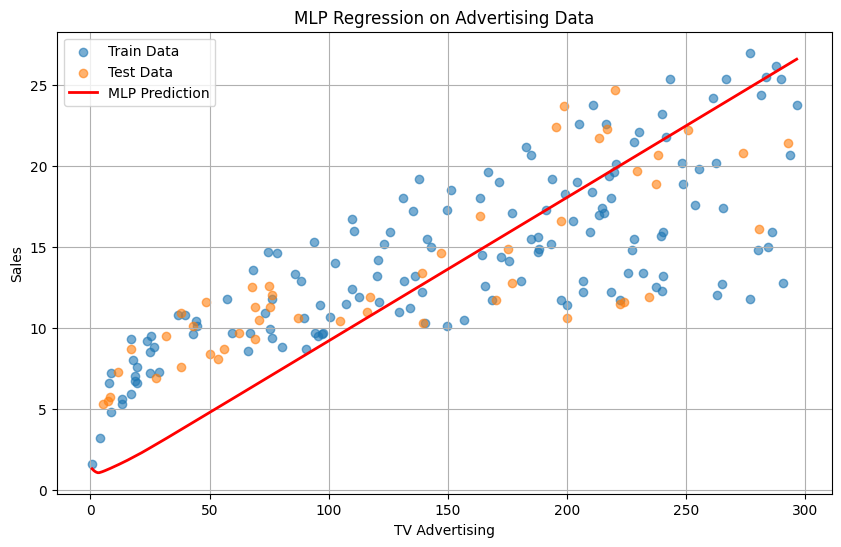

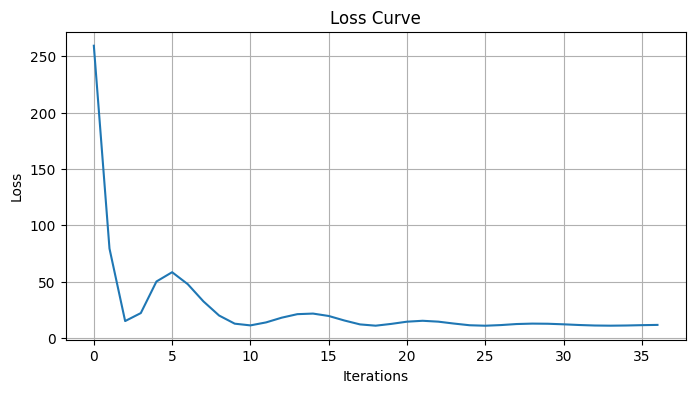

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming advertising DataFrame is already loaded
X = advertising[['TV']]
y = advertising['Sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# More complex MLP with multiple hidden layers
mlp = MLPRegressor(hidden_layer_sizes=(256, 128, 64),
                   activation='relu',
                   solver='adam',
                   max_iter=100000,
                   random_state=42,
                   alpha=0.0)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# MSE evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Visualization (prediction line)
X_plot = np.linspace(X['TV'].min(), X['TV'].max(), 500).reshape(-1, 1)
y_plot_pred = mlp.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label="Train Data", alpha=0.6)
plt.scatter(X_test, y_test, label="Test Data", alpha=0.6)
plt.plot(X_plot, y_plot_pred, color='red', label="MLP Prediction", linewidth=2)
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("MLP Regression on Advertising Data")
plt.legend()
plt.grid(True)
plt.show()

# Optional: plot loss curve to see overfitting/underfitting trend
plt.figure(figsize=(8, 4))
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# # Plot the predictions
# plt.scatter(X_test, y_test, label="Actual")
# plt.scatter(X_test, y_test_pred, label="Predictions")
# plt.xlabel("TV Advertising")
# plt.ylabel("Sales")
# plt.legend()